In [1]:
import sys
sys.path.append("D:\Julian\workspace\endolas\packages")

import random
from endolas import utils
import os
import imageio
import json
from endolas  import closs
from endolas import ccall
from endolas import utils

from endolas import LASTENSequence
from endolas import RegistrationInferSequence

import tensorflow as tf
import numpy as np
import tensorflow.keras.backend as kb
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint

from endolas import UNet
from endolas import preprocess_input as pre_une

from matplotlib import pyplot as plt

In [2]:
tf.config.set_visible_devices([], 'GPU')
visible_devices = tf.config.get_visible_devices()
for device in visible_devices:
    assert device.device_type != 'GPU'

In [3]:
path_validation = r'/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN2A/validation'
path_fixed = r'/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN2A/fix'

lasten_gen = LASTENSequence(path_validation,
                         path_fixed,
                         image_ids=[161],
                         batch_size=1,
                         width=384,
                         height=384,
                         grid_width=18,
                         grid_height=18,
                         preprocess_input=pre_une,
                         shuffle=False,
                         label="keypoints",
                         channel="moving+fixed")

In [4]:
image_id_2_prediction = utils.h5_file_to_dict('/home/julian/Documents/Studium/MT-Masterarbeit/Workspace/endolas/scripts/results/peaks.h5')
reg_gen = RegistrationInferSequence(image_id_2_prediction, 
                                    1,
                                    1,
                                    None) 

In [5]:
X_reg,_ = reg_gen[0]

In [6]:
X_las,_ = lasten_gen[0]

In [7]:
plt.rcParams['figure.figsize'] = (15, 15)

In [8]:
img_reg = X_reg[0,:,:,0]
fix_reg = X_reg[0,:,:,1]

img_las = X_las[0,:,:,0]
fix_las = X_las[0,:,:,1]

In [9]:
diff = img_reg-img_las

In [10]:
diff.max()

0.007843137254902044

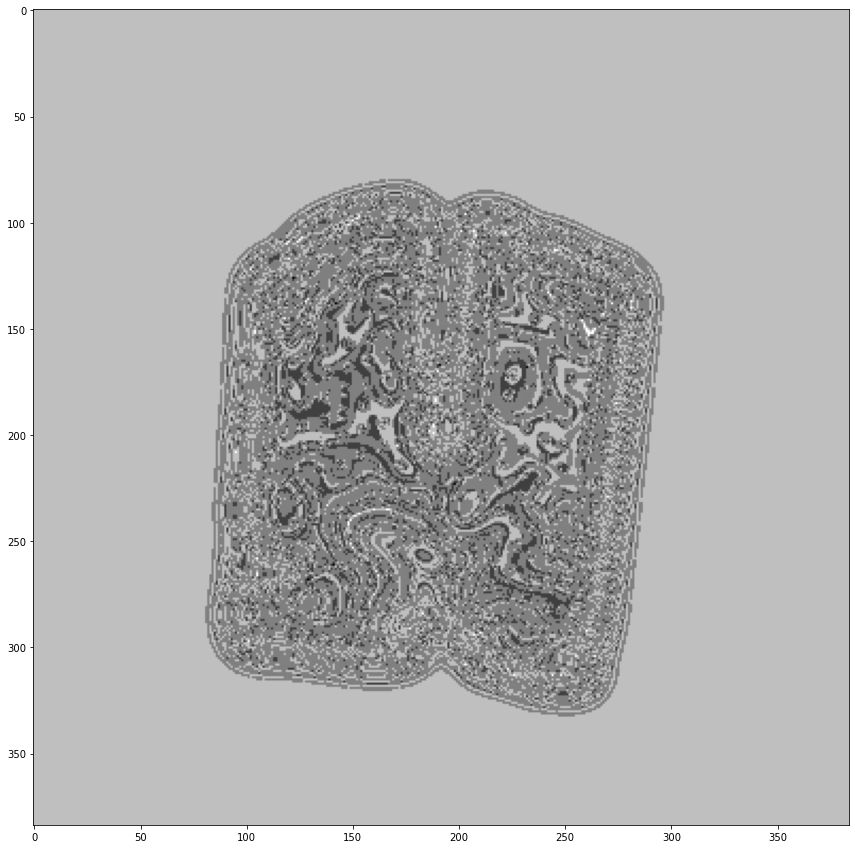

In [11]:
plt.imshow(diff, cmap='gray')

In [12]:
network = '/home/julian/Documents/Studium/MT-Masterarbeit/Workspace/endolas/packages/endolas/resources/registration_8_9_60.hdf5'
#network = '/home/julian/Documents/Studium/MT-Masterarbeit/Workspace/endolas/experiments/results/8_9_euclidean/weights.100.hdf5'

In [13]:
model = tf.keras.models.load_model(network, compile=False)

In [14]:
def plot_cube(img, x, y, val):
    
    img[y][x] = val
    img[y][x-1] = val
    img[y][x+1] = val
    img[y-1][x] = val
    img[y-1][x-1] = val
    img[y-1][x+1] = val
    img[y+1][x] = val
    img[y+1][x-1] = val
    img[y+1][x+1] = val 

In [15]:
from pdb import set_trace

In [16]:
width =384
height = 384

grid_width = 18
grid_height = 18

X, y = val_gen[0]

y_pred = model.predict(X)


plt.imshow(y_pred[0,:,:,0], cmap="gray")

#plt.imsave(store_path + "/u_x.png", u_x, cmap="gray")
#plt.imsave(store_path + "/u_y.png", u_y, cmap="gray")

#u_x.dump(store_path + "/u_x")
#u_y.dump(store_path + "/u_y")

warp = np.zeros((width, height))

for index in range(0,grid_width*grid_height):
    x_pos1 = int(y[0, index, 0, 0])
    y_pos1 = int(y[0, index, 1, 0])
    
    
    #plot_cube(warp, x_pos, y_pos, 1) #blue
    
    ux_field = y_pred[0,:,:,0]
    uy_field = y_pred[0,:,:,1]
    
    
    ux = ux_field[y_pos1][x_pos1]
    uy = uy_field[y_pos1][x_pos1]
    
    x_pos = int(round(x_pos1 + ux))
    y_pos = int(round(y_pos1 + uy))
    
    set_trace()
            
    plot_cube(warp, x_pos, y_pos, 2) #green    
    
    x_pos = int(y[0, index, 0, 1])
    y_pos = int(y[0, index, 1, 1])
    
    #plot_cube(warp, x_pos, y_pos, 3) #yellow    
    
plt.imshow(warp)
plt.imsave('/home/julian/Desktop/good_warp.png', warp)

NameError: name 'val_gen' is not defined

In [ ]:
y[0,0,:,0]